<div style="text-align: center;">
    <h1>House price prediction in King County, USA</h1>
    <h1>Regression model using ANNs</h1>
</div>

## The Data

We will be using data from a Kaggle data set:

https://www.kaggle.com/harlfoxem/housesalesprediction

#### Feature Columns
    
* id - Unique ID for each home sold
* date - Date of the home sale
* price - Price of each home sold
* bedrooms - Number of bedrooms
* bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower
* sqft_living - Square footage of the apartments interior living space
* sqft_lot - Square footage of the land space
* floors - Number of floors
* waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not
* view - An index from 0 to 4 of how good the view of the property was
* condition - An index from 1 to 5 on the condition of the apartment,
* grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.
* sqft_above - The square footage of the interior housing space that is above ground level
* sqft_basement - The square footage of the interior housing space that is below ground level
* yr_built - The year the house was initially built
* yr_renovated - The year of the house’s last renovation
* zipcode - What zipcode area the house is in
* lat - Lattitude
* long - Longitude
* sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
* sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

<strong><center>King County Map</center></strong>
<img src="./king_county.JPG"></a>

In [39]:
# IMPORTING ALL THE LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [21]:
# READING THE CSV FILE
df = pd.read_csv('../data/kc_house_data.csv')

# Exploratory Data Analysis

In [24]:
# "isnull()" returns a table with true and false values for each category
# false is represented by 0 and true is represented as 1.
# we take the sum of those categories and check for any null values, and if there are null values, how many.
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,21597.0,4.580474e+09,2.876736e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21597.0,5.402966e+05,3.673681e+05,7.800000e+04,3.220000e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21597.0,3.373200e+00,9.262989e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21597.0,2.115826e+00,7.689843e-01,5.000000e-01,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21597.0,2.080322e+03,9.181061e+02,3.700000e+02,1.430000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21597.0,1.509941e+04,4.141264e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068500e+04,1.651359e+06
floors,21597.0,1.494096e+00,5.396828e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21597.0,7.547345e-03,8.654900e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21597.0,2.342918e-01,7.663898e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21597.0,3.409825e+00,6.505456e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


C:\Users\avina\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

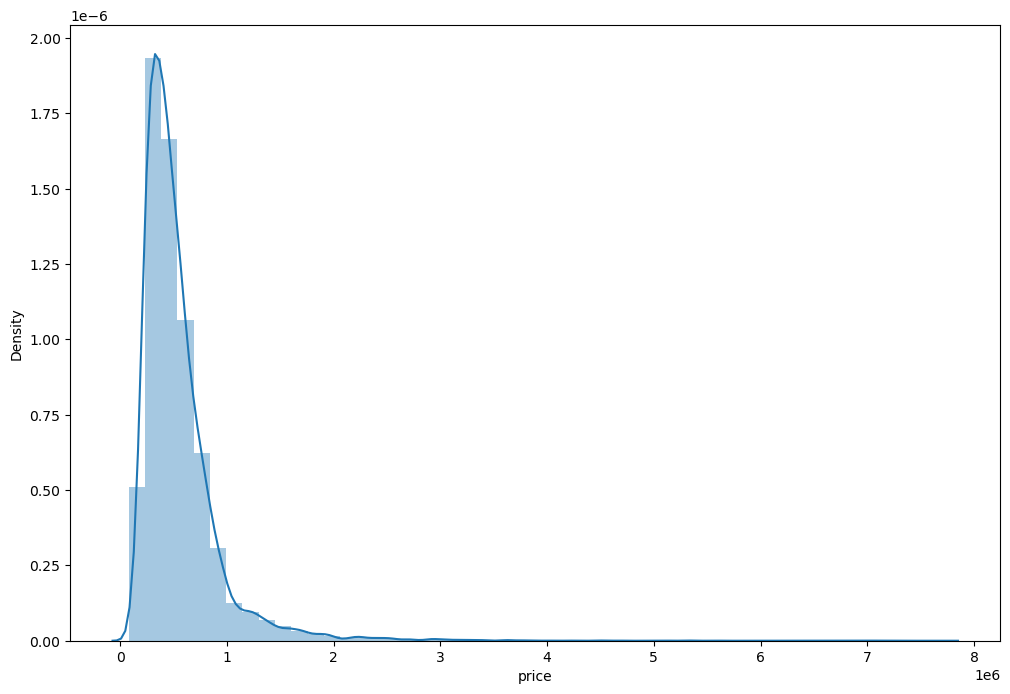

In [25]:
plt.figure(figsize=(12,8))
sns.distplot(df['price'])
# from the distplot below we can see that the cost of most houses lie in the range of 0-3 mil

C:\Users\avina\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bedrooms', ylabel='count'>

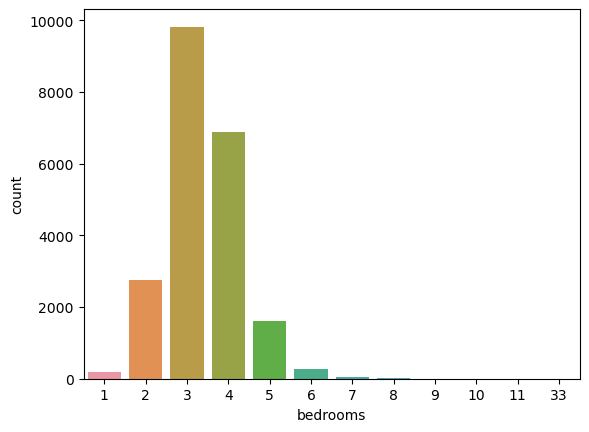

In [28]:
# the countplot below shows the number of bedrooms which most houses have
# here we can confirm that most houses have 2-4 bedrooms.
# some houses have insane number of bedrooms (33), it suggests that they may be very large houses or mansions, 
# these are basically outliers and we will have to clean them from the dataset.

sns.countplot(df['bedrooms'])

In [30]:
# correlation matrix
df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016772,0.001150,0.005162,-0.012241,-0.131911,0.018608,-0.002727,0.011536,-0.023803,0.008188,-0.010799,-0.005193,0.021617,-0.016925,-0.008211,-0.001798,0.020672,-0.002701,-0.138557
price,-0.016772,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.266398,0.397370,0.036056,0.667951,0.605368,0.323799,0.053953,0.126424,-0.053402,0.306692,0.022036,0.585241,0.082845
bedrooms,0.001150,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,-0.006834,0.080008,0.026496,0.356563,0.479386,0.302808,0.155670,0.018389,-0.154092,-0.009951,0.132054,0.393406,0.030690
bathrooms,0.005162,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.063744,0.188386,-0.126479,0.665838,0.686668,0.283440,0.507173,0.050544,-0.204786,0.024280,0.224903,0.569884,0.088303
sqft_living,-0.012241,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.103854,0.284709,-0.059445,0.762779,0.876448,0.435130,0.318152,0.055308,-0.199802,0.052155,0.241214,0.756402,0.184342
sqft_lot,-0.131911,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.021632,0.074900,-0.008830,0.114731,0.184139,0.015418,0.052946,0.007686,-0.129586,-0.085514,0.230227,0.144763,0.718204
floors,0.018608,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.023755,0.028814,-0.264075,0.458794,0.523989,-0.245715,0.489193,0.006427,-0.059541,0.049239,0.125943,0.280102,-0.010722
waterfront,-0.002727,0.266398,-0.006834,0.063744,0.103854,0.021632,0.023755,1.000000,0.401971,0.016611,0.082888,0.072109,0.080559,-0.026153,0.092873,0.030272,-0.014306,-0.041904,0.086507,0.030781
view,0.011536,0.397370,0.080008,0.188386,0.284709,0.074900,0.028814,0.401971,1.000000,0.045999,0.251728,0.167609,0.277078,-0.053636,0.103951,0.084622,0.005871,-0.078107,0.280681,0.072904
condition,-0.023803,0.036056,0.026496,-0.126479,-0.059445,-0.008830,-0.264075,0.016611,0.045999,1.000000,-0.146896,-0.158904,0.173849,-0.361592,-0.060788,0.002888,-0.015102,-0.105877,-0.093072,-0.003126


Text(0.5, 1.0, 'Correlation Matrix Heatmap')

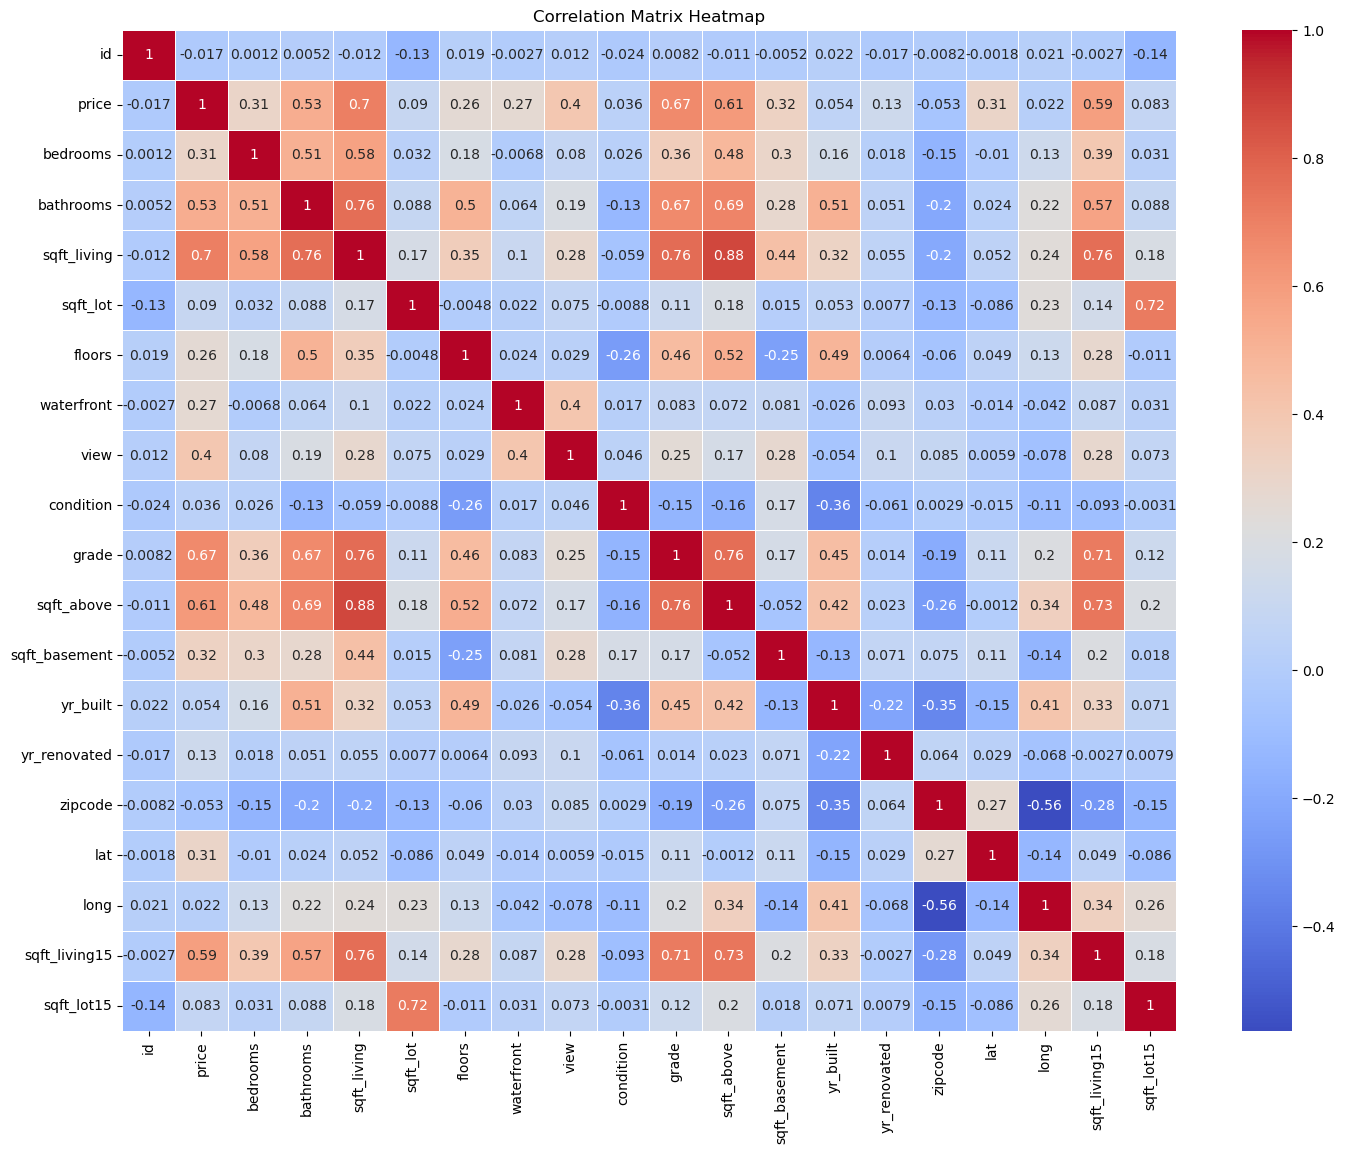

In [40]:
# Creating a heatmap of the correlation matrix
plt.figure(figsize=(17, 13))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')

In [41]:
# here we sort the corelation so its easier to find which categories affect the price more.
df.corr()["price"].sort_values()

zipcode         -0.053402
id              -0.016772
long             0.022036
condition        0.036056
yr_built         0.053953
sqft_lot15       0.082845
sqft_lot         0.089876
yr_renovated     0.126424
floors           0.256804
waterfront       0.266398
lat              0.306692
bedrooms         0.308787
sqft_basement    0.323799
view             0.397370
bathrooms        0.525906
sqft_living15    0.585241
sqft_above       0.605368
grade            0.667951
sqft_living      0.701917
price            1.000000
Name: price, dtype: float64

<AxesSubplot:xlabel='price', ylabel='sqft_living'>

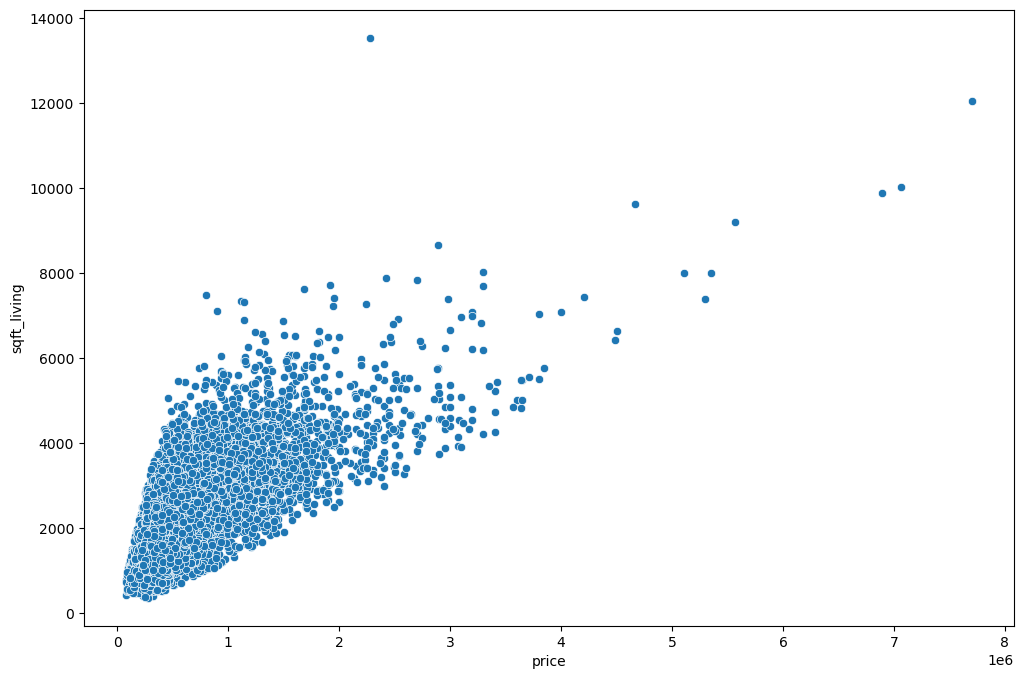

In [45]:
# plotting the price to sqft_living area
# this simply reinforces the evident fact that as the property's area increases, so does its price.

plt.figure(figsize=(12,8))
sns.scatterplot(x='price',y='sqft_living',data=df)

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

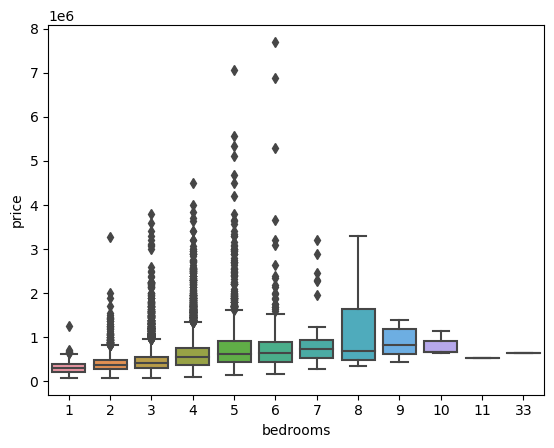

In [10]:
sns.boxplot(x='bedrooms',y='price',data=df)

### Geographical Properties

<AxesSubplot:xlabel='price', ylabel='long'>

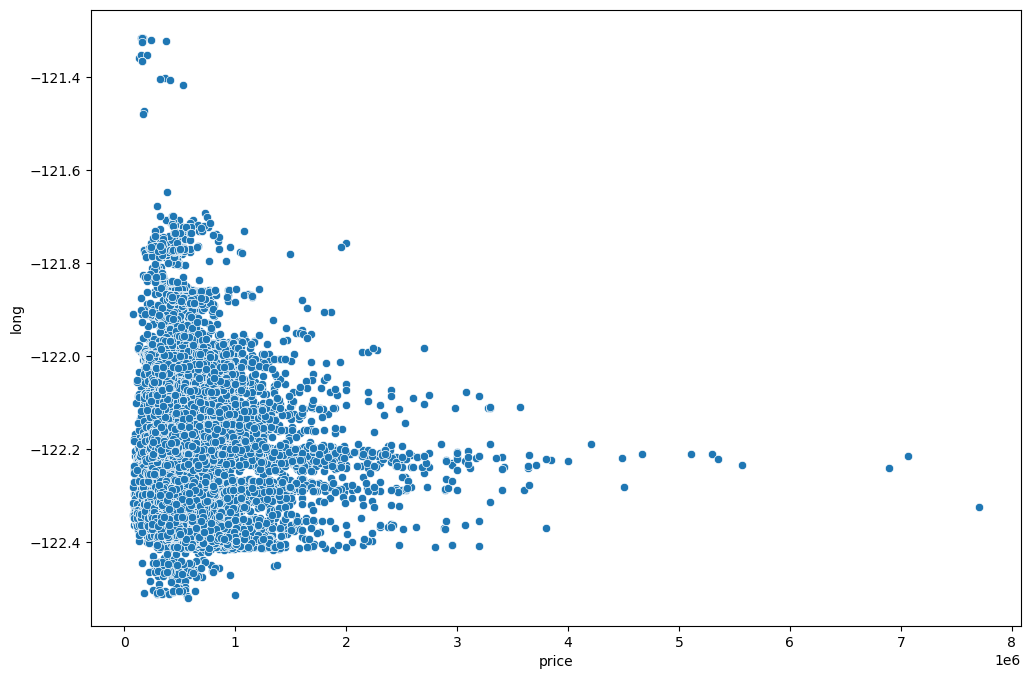

In [46]:
# evaluating how longitude affects the prices of the property.

plt.figure(figsize=(12,8))
sns.scatterplot(x='price',y='long',data=df)

<AxesSubplot:xlabel='price', ylabel='lat'>

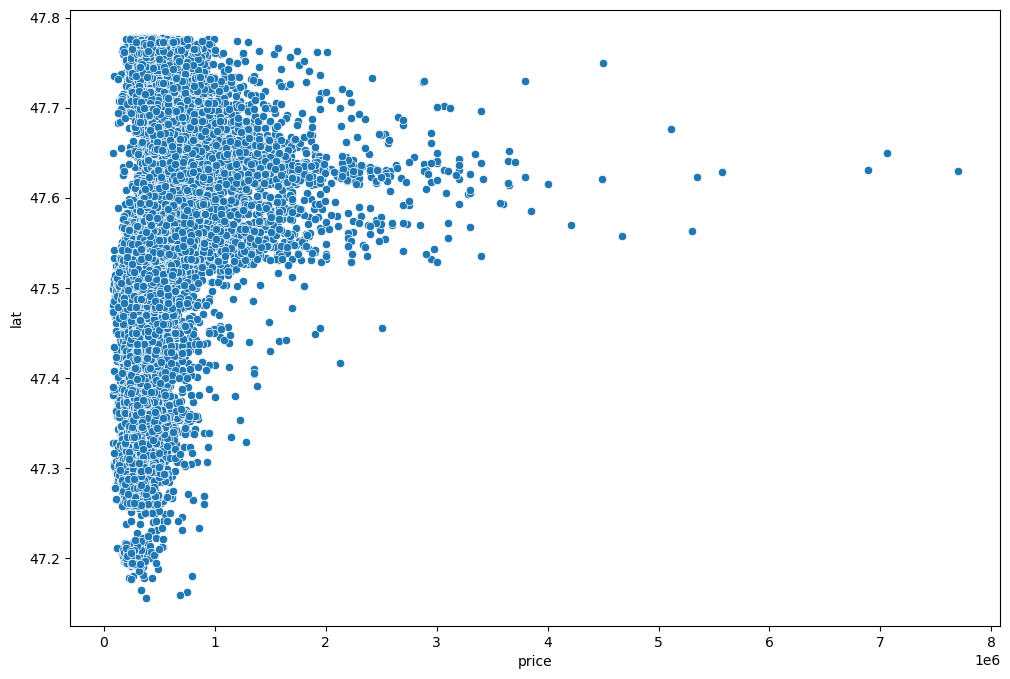

In [47]:
# evaluating how latitude affects the prices of the property.

plt.figure(figsize=(12,8))
sns.scatterplot(x='price',y='lat',data=df)

<AxesSubplot:xlabel='long', ylabel='lat'>

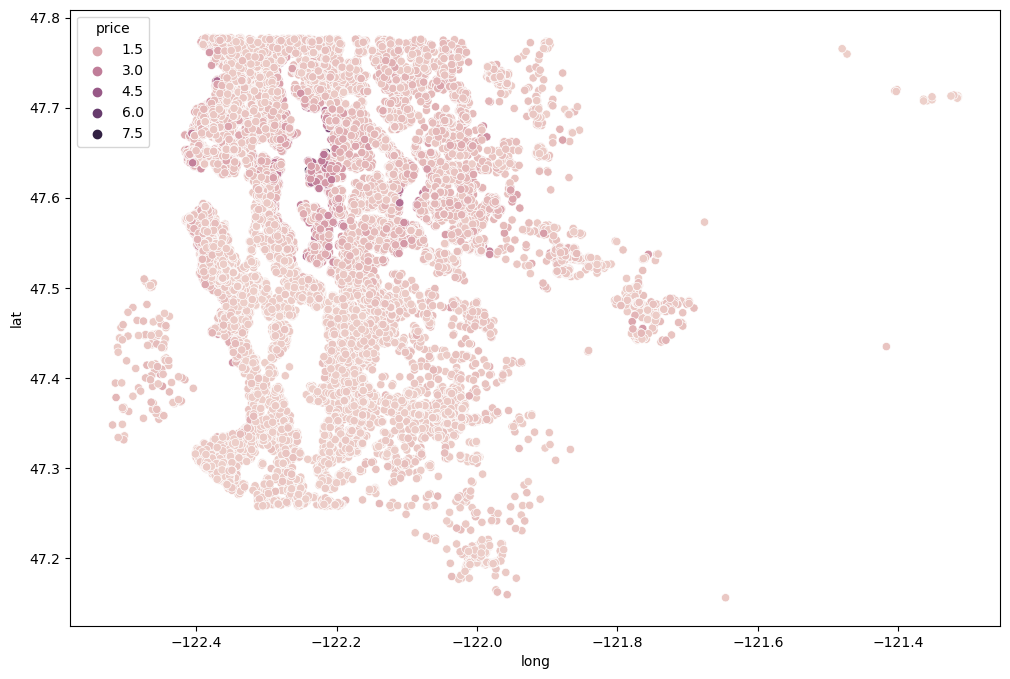

In [49]:
# plotting both the longitude and latitude.
# here we can begin to see a trend, we can begin to see the map of king county, the gaps in between are water bodies.
# refer to the map provided above to see the trends and similarities.

# the color seems faint this is because we have some outliers in our dataset and we 
# must remove them to see the trends and pricier areas to own properties more clearly.

plt.figure(figsize=(12,8))
sns.scatterplot(x='long',y='lat',data=df,hue='price')

In [50]:
df.sort_values('price',ascending=False).head(20)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7245,6762700020,10/13/2014,7700000.0,6,8.00,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
3910,9808700762,6/11/2014,7060000.0,5,4.50,10040,37325,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
9245,9208900037,9/19/2014,6890000.0,6,7.75,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
4407,2470100110,8/4/2014,5570000.0,5,5.75,9200,35069,2.0,0,0,...,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
1446,8907500070,4/13/2015,5350000.0,5,5.00,8000,23985,2.0,0,4,...,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750
1313,7558700030,4/13/2015,5300000.0,6,6.00,7390,24829,2.0,1,4,...,12,5000,2390,1991,0,98040,47.5631,-122.210,4320,24619
1162,1247600105,10/20/2014,5110000.0,5,5.25,8010,45517,2.0,1,4,...,12,5990,2020,1999,0,98033,47.6767,-122.211,3430,26788
8085,1924059029,6/17/2014,4670000.0,5,6.75,9640,13068,1.0,1,4,...,12,4820,4820,1983,2009,98040,47.5570,-122.210,3270,10454
2624,7738500731,8/15/2014,4500000.0,5,5.50,6640,40014,2.0,1,4,...,12,6350,290,2004,0,98155,47.7493,-122.280,3030,23408
8629,3835500195,6/18/2014,4490000.0,4,3.00,6430,27517,2.0,0,0,...,12,6430,0,2001,0,98004,47.6208,-122.219,3720,14592


In [54]:
# length of the dataset denotes the number of houses present in the dataset.

len(df)

21597

In [55]:
# we can remove the 1% of the most pricy properties from the dataset to remove outliers.

len(df)*(0.01)

215.97

In [59]:
# we can create a dataframe of the non top one percent and plot them again using lat and long in scatterplot.
# the iloc basically grabs everything after the top 216 houses which are the most pricy ones (1% of the datset).

non_top_1_perc = df.sort_values('price',ascending=False).iloc[216:]

<AxesSubplot:xlabel='long', ylabel='lat'>

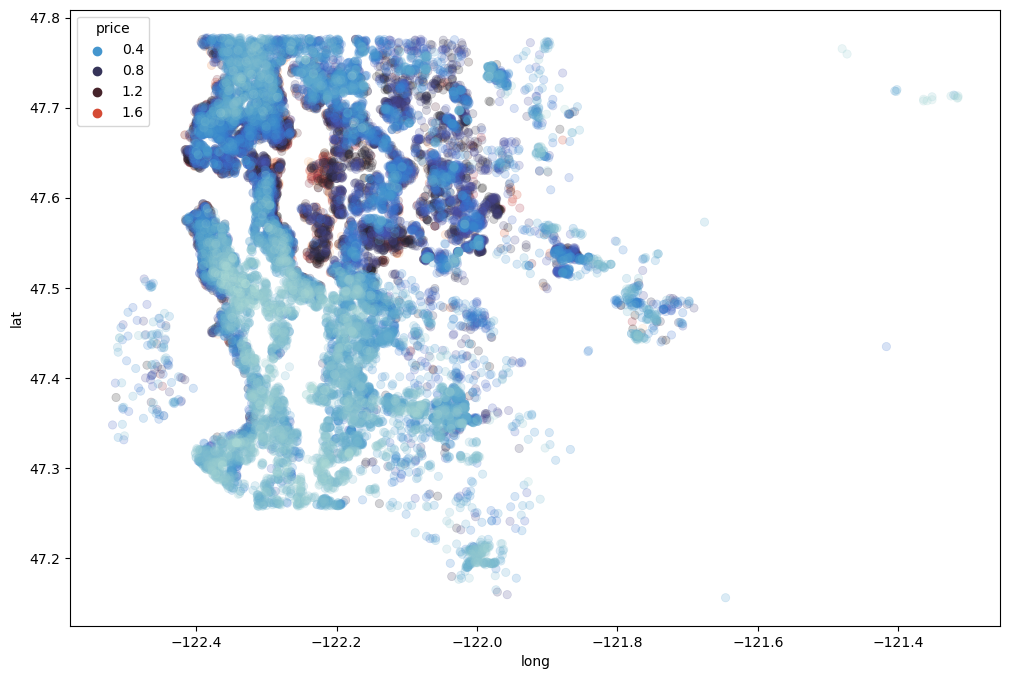

In [62]:
# now that we have removed the outliers, we can see the differences in the prices more clearly.
# In the figure below, we can observe that properties located near water bodies are more expensive, which is quite evident.

plt.figure(figsize=(12,8))
sns.scatterplot(x='long',y='lat',
                data=non_top_1_perc,hue='price',
                palette='icefire',edgecolor=None,alpha=0.2)

### Other Features

<AxesSubplot:xlabel='waterfront', ylabel='price'>

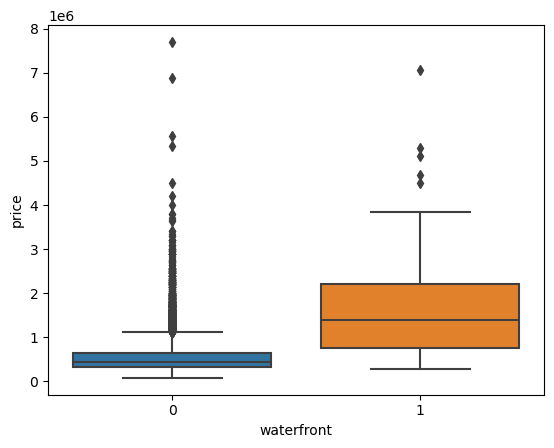

In [63]:
sns.boxplot(x='waterfront',y='price',data=df)

## Working with Feature Data

In [64]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  int64  
 9   view           21597 non-null  int64  
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  int64  
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  int64  
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [66]:
# since id is useless to us, we simply drop it.

df = df.drop('id',axis=1)

In [67]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### Feature Engineering from Date

In [68]:
df['date'] = pd.to_datetime(df['date'])

In [76]:
# creating a month column

df['month'] = df['date'].apply(lambda date:date.month)

In [77]:
# creating a year column

df['year'] = df['date'].apply(lambda date:date.year)

In [78]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month,year
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,0,1955,0,98178,47.5112,-122.257,1340,5650,10,2014
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,12,2014
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2,2015
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,910,1965,0,98136,47.5208,-122.393,1360,5000,12,2014
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2,2015


<AxesSubplot:xlabel='year', ylabel='price'>

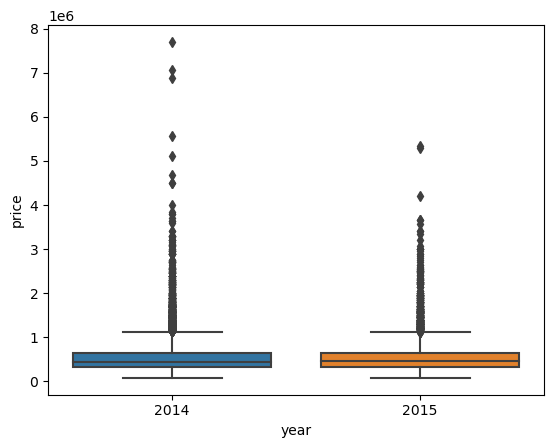

In [79]:
sns.boxplot(x='year',y='price',data=df)

<AxesSubplot:xlabel='month', ylabel='price'>

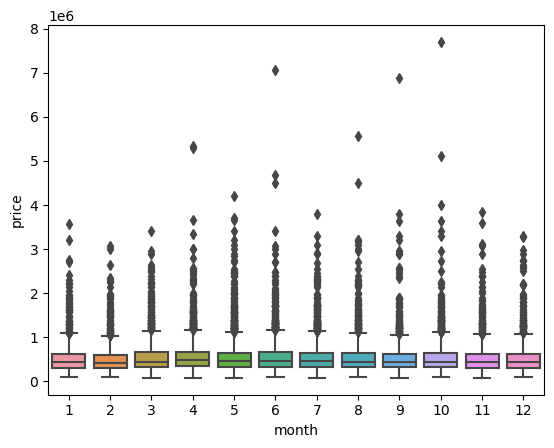

In [80]:
sns.boxplot(x='month',y='price',data=df)

<AxesSubplot:xlabel='month'>

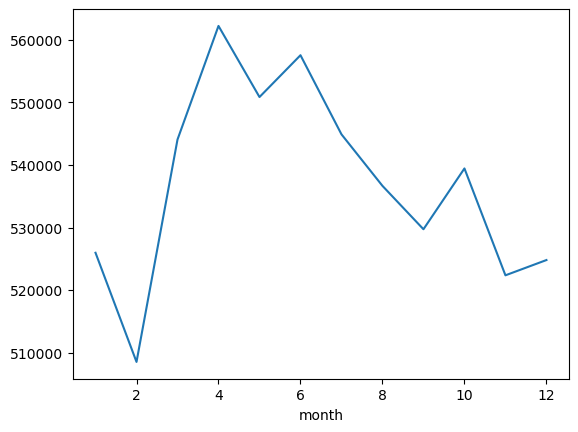

In [82]:
# trying to find which months had the property sold at higher prices.

df.groupby('month').mean()['price'].plot()

<AxesSubplot:xlabel='year'>

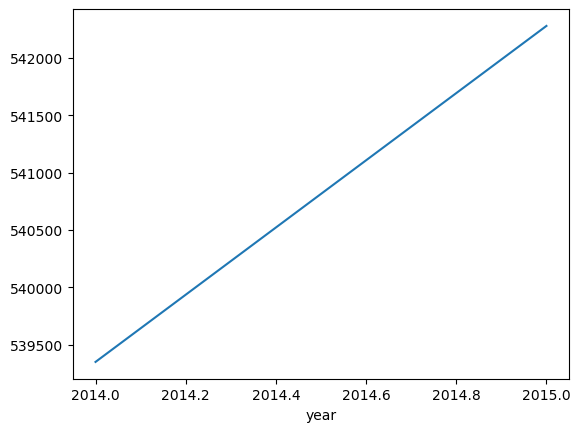

In [84]:
# the price of the property increases over time which is obvious considering the factors like inflation n stuff.

df.groupby('year').mean()['price'].plot()

In [85]:
df = df.drop('date',axis=1)

In [87]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'month', 'year'],
      dtype='object')

In [88]:
# map with zip codes: https://i.pinimg.com/originals/4a/ab/31/4aab31ce95d5b8474fd2cc063f334178.jpg
# May be worth considering to remove this or feature engineer categories from it
df['zipcode'].value_counts()

98103    602
98038    589
98115    583
98052    574
98117    553
        ... 
98102    104
98010    100
98024     80
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

In [89]:
df = df.drop('zipcode',axis=1)

In [90]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,month,year
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,10,2014
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639,12,2014
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062,2,2015
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000,12,2014
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503,2,2015


In [93]:
# finding when the house was renovated, 0 indicates the property was never renovated.

df['yr_renovated'].value_counts()

0       20683
2014       91
2013       37
2003       36
2005       35
        ...  
1951        1
1959        1
1948        1
1954        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

In [94]:
# 0 means houses with no basements.

df['sqft_basement'].value_counts()

0      13110
600      221
700      218
500      214
800      206
       ...  
518        1
374        1
784        1
906        1
248        1
Name: sqft_basement, Length: 306, dtype: int64

## Scaling and Train Test Split

In [95]:
X = df.drop('price',axis=1)
y = df['price']

In [96]:
from sklearn.model_selection import train_test_split

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

### Scaling

In [98]:
# by scaling we are basically normalising the values between 0 and 1.

from sklearn.preprocessing import MinMaxScaler

In [99]:
scaler = MinMaxScaler()

In [100]:
X_train= scaler.fit_transform(X_train)

In [101]:
X_test = scaler.transform(X_test)

In [104]:
# here we can see that we have 19 inputs so we can have 19 input neurons to process the data.

X_train.shape

(15117, 19)

In [105]:
X_test.shape

(6480, 19)

## Creating a Model

In [107]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

In [108]:
model = Sequential()

In [109]:
model = Sequential()

# by adding more than 2 layers we have basically made this a deep neural network.
# each layer has 19 neurons or perceptrons to process the data.
# and we have 4 such layers.

model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))

# then finally we have one neuron which provides us the output values.
model.add(Dense(1))

# using adam optimiser and mean square error as loss.
model.compile(optimizer='adam',loss='mse')

## Training the Model

In [111]:
# after each epoch of training on the training data we can quickly run the test data and check our loss on the test data.
# this way we can keep track of how well its perfoming, by doing this we can see whether or not we are overfitting.

model.fit(x=X_train,y=y_train.values,
          validation_data=(X_test,y_test.values),
          batch_size=128,epochs=400)

Epoch 1/400
119/119 [==============================] - 3s 7ms/step - loss: 430240432128.0000 - val_loss: 418915581952.0000
Epoch 2/400
119/119 [==============================] - 1s 5ms/step - loss: 429157711872.0000 - val_loss: 415177244672.0000
Epoch 3/400
119/119 [==============================] - 1s 5ms/step - loss: 414461689856.0000 - val_loss: 381785604096.0000
Epoch 4/400
119/119 [==============================] - 1s 5ms/step - loss: 343373905920.0000 - val_loss: 266798170112.0000
Epoch 5/400
119/119 [==============================] - 1s 5ms/step - loss: 197516771328.0000 - val_loss: 124443123712.0000
Epoch 6/400
119/119 [==============================] - 1s 5ms/step - loss: 107572584448.0000 - val_loss: 95269568512.0000
Epoch 7/400
119/119 [==============================] - 1s 5ms/step - loss: 97695784960.0000 - val_loss: 93785890816.0000
Epoch 8/400
119/119 [==============================] - 1s 5ms/step - loss: 96082329600.0000 - val_loss: 92236480512.0000
Epoch 9/400
119/119 [

119/119 [==============================] - 1s 5ms/step - loss: 38920290304.0000 - val_loss: 37711118336.0000
Epoch 69/400
119/119 [==============================] - 1s 5ms/step - loss: 38780571648.0000 - val_loss: 37492604928.0000
Epoch 70/400
119/119 [==============================] - 1s 5ms/step - loss: 38549983232.0000 - val_loss: 37349466112.0000
Epoch 71/400
119/119 [==============================] - 1s 5ms/step - loss: 38364860416.0000 - val_loss: 37116207104.0000
Epoch 72/400
119/119 [==============================] - 1s 5ms/step - loss: 38189010944.0000 - val_loss: 36950773760.0000
Epoch 73/400
119/119 [==============================] - 1s 5ms/step - loss: 37995655168.0000 - val_loss: 37044879360.0000
Epoch 74/400
119/119 [==============================] - 1s 5ms/step - loss: 37883256832.0000 - val_loss: 36612767744.0000
Epoch 75/400
119/119 [==============================] - 1s 5ms/step - loss: 37661265920.0000 - val_loss: 36450574336.0000
Epoch 76/400
119/119 [===============

Epoch 135/400
119/119 [==============================] - 1s 4ms/step - loss: 33251760128.0000 - val_loss: 31774683136.0000
Epoch 136/400
119/119 [==============================] - 1s 5ms/step - loss: 33128931328.0000 - val_loss: 31709650944.0000
Epoch 137/400
119/119 [==============================] - 1s 5ms/step - loss: 33080229888.0000 - val_loss: 31638683648.0000
Epoch 138/400
119/119 [==============================] - 0s 4ms/step - loss: 33079879680.0000 - val_loss: 31605651456.0000
Epoch 139/400
119/119 [==============================] - 1s 5ms/step - loss: 33039335424.0000 - val_loss: 31573114880.0000
Epoch 140/400
119/119 [==============================] - 1s 5ms/step - loss: 32996198400.0000 - val_loss: 31525269504.0000
Epoch 141/400
119/119 [==============================] - 1s 5ms/step - loss: 32942759936.0000 - val_loss: 31642673152.0000
Epoch 142/400
119/119 [==============================] - 1s 5ms/step - loss: 32965738496.0000 - val_loss: 31485679616.0000
Epoch 143/400
11

119/119 [==============================] - 1s 5ms/step - loss: 31691085824.0000 - val_loss: 29926641664.0000
Epoch 202/400
119/119 [==============================] - 1s 5ms/step - loss: 31642120192.0000 - val_loss: 30071799808.0000
Epoch 203/400
119/119 [==============================] - 1s 5ms/step - loss: 31690442752.0000 - val_loss: 29939527680.0000
Epoch 204/400
119/119 [==============================] - 1s 5ms/step - loss: 31640436736.0000 - val_loss: 29846874112.0000
Epoch 205/400
119/119 [==============================] - 1s 5ms/step - loss: 31607498752.0000 - val_loss: 29829435392.0000
Epoch 206/400
119/119 [==============================] - 1s 5ms/step - loss: 31564285952.0000 - val_loss: 29836339200.0000
Epoch 207/400
119/119 [==============================] - 1s 5ms/step - loss: 31581358080.0000 - val_loss: 29787566080.0000
Epoch 208/400
119/119 [==============================] - 1s 5ms/step - loss: 31569897472.0000 - val_loss: 29822892032.0000
Epoch 209/400
119/119 [=======

119/119 [==============================] - 1s 5ms/step - loss: 30875717632.0000 - val_loss: 28972722176.0000
Epoch 268/400
119/119 [==============================] - 1s 5ms/step - loss: 30814029824.0000 - val_loss: 28869003264.0000
Epoch 269/400
119/119 [==============================] - 1s 5ms/step - loss: 30849447936.0000 - val_loss: 28873252864.0000
Epoch 270/400
119/119 [==============================] - 1s 5ms/step - loss: 30790318080.0000 - val_loss: 28852314112.0000
Epoch 271/400
119/119 [==============================] - 1s 4ms/step - loss: 30773170176.0000 - val_loss: 28854378496.0000
Epoch 272/400
119/119 [==============================] - 1s 5ms/step - loss: 30778621952.0000 - val_loss: 28847468544.0000
Epoch 273/400
119/119 [==============================] - 1s 5ms/step - loss: 30792607744.0000 - val_loss: 28836728832.0000
Epoch 274/400
119/119 [==============================] - 1s 5ms/step - loss: 30764390400.0000 - val_loss: 28902176768.0000
Epoch 275/400
119/119 [=======

119/119 [==============================] - 1s 5ms/step - loss: 30152695808.0000 - val_loss: 28056641536.0000
Epoch 334/400
119/119 [==============================] - 1s 4ms/step - loss: 30157092864.0000 - val_loss: 28070762496.0000
Epoch 335/400
119/119 [==============================] - 1s 5ms/step - loss: 30130765824.0000 - val_loss: 28014401536.0000
Epoch 336/400
119/119 [==============================] - 1s 5ms/step - loss: 30112643072.0000 - val_loss: 28017188864.0000
Epoch 337/400
119/119 [==============================] - 1s 5ms/step - loss: 30142601216.0000 - val_loss: 28014039040.0000
Epoch 338/400
119/119 [==============================] - 1s 5ms/step - loss: 30100449280.0000 - val_loss: 28092379136.0000
Epoch 339/400
119/119 [==============================] - 1s 5ms/step - loss: 30100676608.0000 - val_loss: 28047699968.0000
Epoch 340/400
119/119 [==============================] - 1s 5ms/step - loss: 30159925248.0000 - val_loss: 27952334848.0000
Epoch 341/400
119/119 [=======

119/119 [==============================] - 1s 4ms/step - loss: 29531111424.0000 - val_loss: 27209687040.0000
Epoch 400/400
119/119 [==============================] - 1s 4ms/step - loss: 29548271616.0000 - val_loss: 27544719360.0000


In [112]:
pd.DataFrame(model.history.history)

,loss,val_loss
0,4.302404e+11,4.189156e+11
1,4.291577e+11,4.151772e+11
2,4.144617e+11,3.817856e+11
3,3.433739e+11,2.667982e+11
4,1.975168e+11,1.244431e+11
...,...,...
395,2.958195e+10,2.727352e+10
396,2.962950e+10,2.723769e+10
397,2.955004e+10,2.722485e+10
398,2.953111e+10,2.720969e+10


In [113]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

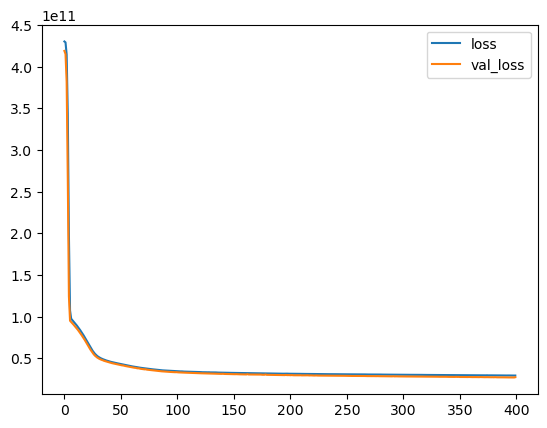

In [115]:
# the data is not overfitting, if we had some spikes going up or sth of the orange line 
# then it could be an indication that the data has been overfitted.
# hence, we can continue training as the orange line is also going down.

losses.plot()

# Evaluation on Test Data

https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics

In [116]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

#### Predicting on Brand New Data

In [117]:
X_test

array([[0.1       , 0.08      , 0.04239917, ..., 0.00887725, 0.63636364,
        0.        ],
       [0.3       , 0.36      , 0.17269907, ..., 0.00993734, 0.81818182,
        0.        ],
       [0.2       , 0.24      , 0.12512927, ..., 0.00547073, 0.90909091,
        0.        ],
       ...,
       [0.1       , 0.08      , 0.05584281, ..., 0.00506255, 1.        ,
        0.        ],
       [0.3       , 0.2       , 0.22233713, ..., 0.00774485, 0.09090909,
        1.        ],
       [0.3       , 0.32      , 0.27611169, ..., 0.0196531 , 0.45454545,
        0.        ]])

In [118]:
# we put the x_test into predictions.

predictions = model.predict(X_test)

203/203 [==============================] - 1s 3ms/step


In [122]:
# we then compare the y_test to predictions to find mse
# this tells us that the price predicted is off by 100k which is not great but not bad either.

mean_absolute_error(y_test,predictions)

103783.82007378472

In [123]:
np.sqrt(mean_squared_error(y_test,predictions))

165966.01247690016

In [124]:
explained_variance_score(y_test,predictions)

0.7943390730049982

In [125]:
# finding the mean prices of the houses

df['price'].mean()

540296.5735055795

In [126]:
df['price'].median()

450000.0

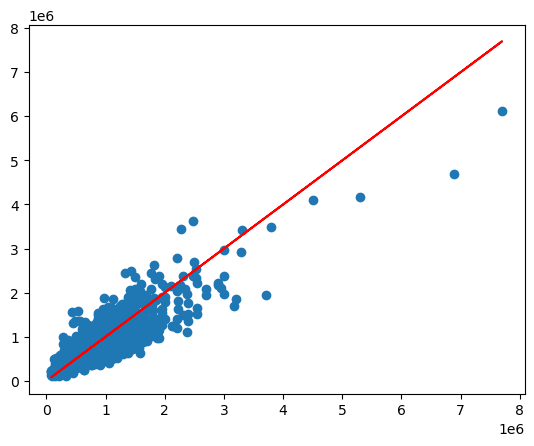

In [129]:
# Our predictions
plt.scatter(y_test,predictions)

# Perfect predictions, the red line represents perfect predictions.
# we can see from the plot below that our model is good at predicting the 
# price of houses which cost around 0-2 million and not so good at predicting property more than that.
plt.plot(y_test,y_test,'r')

In [130]:
errors = y_test.values.reshape(6480, 1) - predictions

C:\Users\avina\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

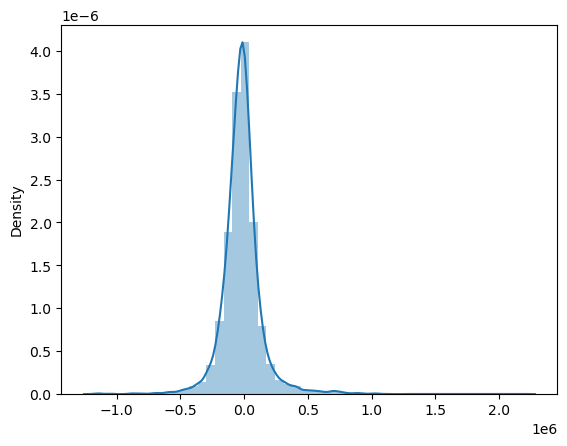

In [131]:
sns.distplot(errors)

-------------
### Predicting on a brand new house

In [142]:
# suppose we have a new house in the merket with the following features:

df.drop('price',axis=1).iloc[0]

bedrooms            3.0000
bathrooms           1.0000
sqft_living      1180.0000
sqft_lot         5650.0000
floors              1.0000
waterfront          0.0000
view                0.0000
condition           3.0000
grade               7.0000
sqft_above       1180.0000
sqft_basement       0.0000
yr_built         1955.0000
yr_renovated        0.0000
lat                47.5112
long             -122.2570
sqft_living15    1340.0000
sqft_lot15       5650.0000
month              10.0000
year             2014.0000
Name: 0, dtype: float64

In [143]:
single_house = df.drop('price',axis=1).iloc[0]

In [144]:
single_house.values

array([ 3.00000e+00,  1.00000e+00,  1.18000e+03,  5.65000e+03,
        1.00000e+00,  0.00000e+00,  0.00000e+00,  3.00000e+00,
        7.00000e+00,  1.18000e+03,  0.00000e+00,  1.95500e+03,
        0.00000e+00,  4.75112e+01, -1.22257e+02,  1.34000e+03,
        5.65000e+03,  1.00000e+01,  2.01400e+03])

In [145]:
single_house.values.reshape(-1, 19)

array([[ 3.00000e+00,  1.00000e+00,  1.18000e+03,  5.65000e+03,
         1.00000e+00,  0.00000e+00,  0.00000e+00,  3.00000e+00,
         7.00000e+00,  1.18000e+03,  0.00000e+00,  1.95500e+03,
         0.00000e+00,  4.75112e+01, -1.22257e+02,  1.34000e+03,
         5.65000e+03,  1.00000e+01,  2.01400e+03]])

In [146]:
# normalising by scaling

single_house = scaler.transform(single_house.values.reshape(-1, 19))

C:\Users\avina\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [147]:
single_house

array([[0.2       , 0.08      , 0.08376422, 0.00310751, 0.        ,
        0.        , 0.        , 0.5       , 0.4       , 0.10785619,
        0.        , 0.47826087, 0.        , 0.57149751, 0.21760797,
        0.16193426, 0.00582059, 0.81818182, 0.        ]])

In [150]:
# this is the predicted price in which this hpuse will sell at.

model.predict(single_house)

1/1 [==============================] - 0s 51ms/step


array([[290933.1]], dtype=float32)

In [155]:
# here we can see below that the true value at which this house was 
# sold at is $221,900 and our prediction was $290,933 whihc is not that bad.

# we can have better predictions by maybe removing the top 2 or 3 percent 
# of the houses from that trainig dataset and then trying again, but so far so good this seems to perform okay.

df.iloc[0]

price            221900.0000
bedrooms              3.0000
bathrooms             1.0000
sqft_living        1180.0000
sqft_lot           5650.0000
floors                1.0000
waterfront            0.0000
view                  0.0000
condition             3.0000
grade                 7.0000
sqft_above         1180.0000
sqft_basement         0.0000
yr_built           1955.0000
yr_renovated          0.0000
lat                  47.5112
long               -122.2570
sqft_living15      1340.0000
sqft_lot15         5650.0000
month                10.0000
year               2014.0000
Name: 0, dtype: float64